# Modeling the Tigray, Ethiopia Conflict

 #### Tigray Genocide Background and Context:
The conflict in Tigray, Ethiopia, also referred as the ‘Tigray genocidal war’ is a complex and highly
contentious issue that began in November 2020. It involves multiple actors, including the
Ethiopian federal government, Amhara special forces and militias, other regional forces, foreign
forces (Eritrean, Somali), and middle eastern superpower countries in one side against TPLF led
the people of Tigray in one side in which the people of Tigray were fighting for their survival and
the other despotic groups were fighting for power struggle.
Several political elites and scholars traced the conflict to a power struggle between Prime Minister
Abiy Ahmed and the TPLF, which had been the dominant political forces in Ethiopia for nearly
three decades until Abiy took office in 2018. Tensions escalated when the Tigray regional
government defied the federal government by holding its own regional election in September
2020, which the constitutionally illegal central government deemed the regional election illegal.
In response, the Ethiopian government launched a military offensive in early November 2020 in
the name of law enforcement and aiming to remove the TPLF from power. The genocidal war
continued for more than two years and stopped in late 2022 upon the signing of permanent
cessation of hostilities between the Federal government and the TPLF in November 2022 in
Pretoria, South Africa.

#### Scale and Impact:
The Ethiopian government imposed a media blackout and restricted access to the Tigray region,
making it challenging to obtain accurate information about the conflict’s scale and impact.
However, reports from humanitarian organization, international media outlets, and eyewitness
accounts have shed light on the dire humanitarian situation in Tigray. The war has indeed taken
over one million noncombatant lives, destroyed more than 90% of Tigray infrastructures and took
the region 50 years back, almost to the times when the 17 years of struggle for freedom and
equality started by elites of Tigran origin which later formed an inclusive party (Ethiopian Peoples
Republic Democratic Front (EPRDF) and ruled the federalist Ethiopia for 27 years.


### Import Basic and Required Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import io
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
# Save the figure
if not os.path.exists('figures'):
    os.makedirs('figures')

### Reading the Data

 #### The Data:
 The paper is an argumentative column and supported with data from Kimetrica Data Publishing
(conflict model-Ethiopia/Ethiopia_acled-nov_05_2020). The data covers from 1997 to November
05, 2020. In an eventuate time scale, 1997 was two years after the second national election in
which most opposition groups boycotted the election and the November 5, 2020, is one day after
the start of the Tigray genocide war. It is also important to note the data presented here is limited
and might not reflect a whole as access to data is hard in a despotic regime. It is deemed enough
however to argue the lethargic leadership of TPLF and its political elites to predict and if not
prevent the war, at least prepare, and reduce the damage was shambolic and will be remembered
at the weakest point in Tigray history for generations to come.
Kimetric Data Publisher collects conflict data in Ethiopia from 1997 to 2020 and categorized data
by year, event type, sub event type, event actors, locations the event occurred and fatalities.
There were over 6000 events/ incidents collected and used for this analysis.

In [19]:
# read csv data
df=pd.read_csv('ethiopiaconflictmodel.csv')
# display the top 5 rows
df.head()

,Unnamed: 0,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,0,7270682,231,ETH5713,5713,2020-10-28,2020,1,Protests,Protest with intervention,...,Bahir Dar,11.6000,37.3833,1,Addis Standard,National,"On 28 October 2020, protesters associated with...",0,1604351343,ETH
1,1,7270683,231,ETH5712,5712,2020-10-28,2020,1,Battles,Armed clash,...,Shinile,9.6881,41.8447,2,Addis Standard,National,"On 28 October 2020, Somali and Afar ethnic mil...",27,1604351343,ETH
2,2,7271335,231,ETH5715,5715,2020-10-26,2020,1,Violence against civilians,Attack,...,Shashamane,7.2000,38.6000,1,VOA,International,"On 26 October 2020, police forces shot and kil...",1,1604351347,ETH
3,3,7270738,231,ETH5714,5714,2020-10-24,2020,1,Violence against civilians,Attack,...,Sebeta,8.9167,38.6167,1,BBC News,International,"On 24 October 2020, unidentified men beat to d...",1,1604351343,ETH
4,4,7271022,231,ETH5709,5709,2020-10-24,2020,1,Violence against civilians,Attack,...,Aweday,9.3577,42.0458,1,Oromiya Media Network,International,"On 24 October 2020, Oromia state police shot a...",1,1604351344,ETH


In [20]:
# view shape and columns
print(df.shape)
print(df.columns)

(5593, 32)
Index(['Unnamed: 0', 'data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty',
       'event_date', 'year', 'time_precision', 'event_type', 'sub_event_type',
       'actor1', 'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2',
       'inter2', 'interaction', 'region', 'country', 'admin1', 'admin2',
       'admin3', 'location', 'latitude', 'longitude', 'geo_precision',
       'source', 'source_scale', 'notes', 'fatalities', 'timestamp', 'iso3'],
      dtype='object')


In [21]:
# There are several columns that are not needed for the analysis and must be dropped
df=df.drop(['Unnamed: 0', 'data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'time_precision',
       'inter1','inter2', 'interaction', 'region', 'country','geo_precision',
       'source', 'source_scale', 'notes', 'timestamp', 'iso3'],axis=1)
df.head()

,event_date,year,event_type,sub_event_type,actor1,assoc_actor_1,actor2,assoc_actor_2,admin1,admin2,admin3,location,latitude,longitude,fatalities
0,2020-10-28,2020,Protests,Protest with intervention,Protesters (Ethiopia),NaMA: National Movement of Amhara; Amhara Ethn...,Military Forces of Ethiopia (2018-),NaN,Amhara,Bar Dar Sp. Zone,Bahir Dar Zuria,Bahir Dar,11.6000,37.3833,0
1,2020-10-28,2020,Battles,Armed clash,Somali Ethnic Militia (Ethiopia),NaN,Afar Ethnic Militia (Ethiopia),NaN,Somali,Sitti,Shinile,Shinile,9.6881,41.8447,27
2,2020-10-26,2020,Violence against civilians,Attack,Police Forces of Ethiopia (2018-),NaN,Civilians (Ethiopia),Teachers (Ethiopia),Oromia,Arsi,Shashamane,Shashamane,7.2000,38.6000,1
3,2020-10-24,2020,Violence against civilians,Attack,Unidentified Armed Group (Ethiopia),NaN,Civilians (Ethiopia),Orthodox Christian Group (Ethiopia); Oromo Eth...,Oromia,Oromia-Finfinne,Sebeta,Sebeta,8.9167,38.6167,1
4,2020-10-24,2020,Violence against civilians,Attack,Police Forces of Ethiopia (2018-) Oromia State...,NaN,Civilians (Ethiopia),Taxi Drivers (Ethiopia),Oromia,East Harerghe,Haro Maya,Aweday,9.3577,42.0458,1


### Data Analysis

In [22]:
# Inspect data types
print(df.dtypes)

event_date         object
year                int64
event_type         object
sub_event_type     object
actor1             object
assoc_actor_1      object
actor2             object
assoc_actor_2      object
admin1             object
admin2             object
admin3             object
location           object
latitude          float64
longitude         float64
fatalities          int64
dtype: object


In [23]:
# Check for rows with missing values
print(df.isnull().sum())

event_date           0
year                 0
event_type           0
sub_event_type       0
actor1               0
assoc_actor_1     4179
actor2            1468
assoc_actor_2     4367
admin1               0
admin2               0
admin3              12
location             0
latitude             0
longitude            0
fatalities           0
dtype: int64


In [24]:
# Actors are object data type and have no use in our analysis.
# They have also several missing values and therefore should be dropped.
df=df.drop(['assoc_actor_1','actor2','assoc_actor_2'],axis=1)
print(df.isna().sum())

event_date         0
year               0
event_type         0
sub_event_type     0
actor1             0
admin1             0
admin2             0
admin3            12
location           0
latitude           0
longitude          0
fatalities         0
dtype: int64


In [25]:
# View Count
df.count()

event_date        5593
year              5593
event_type        5593
sub_event_type    5593
actor1            5593
admin1            5593
admin2            5593
admin3            5581
location          5593
latitude          5593
longitude         5593
fatalities        5593
dtype: int64

In [26]:
# View duplicates
df[df.duplicated()].count()

event_date        19
year              19
event_type        19
sub_event_type    19
actor1            19
admin1            19
admin2            19
admin3            19
location          19
latitude          19
longitude         19
fatalities        19
dtype: int64

In [27]:
# Run descripitive statstics an variable data
df.describe()

,year,latitude,longitude,fatalities
count,5593.000000,5593.000000,5593.000000,5593.000000
mean,2013.285357,8.941712,39.462088,8.117289
std,6.030866,1.974775,2.567779,56.135542
min,1997.000000,3.450000,33.086200,0.000000
25%,2010.000000,8.038500,37.766800,0.000000
50%,2016.000000,9.033300,39.049000,0.000000
75%,2018.000000,9.507600,41.777300,3.000000
max,2020.000000,14.527300,46.181100,1172.000000


In [28]:
# Convert event_date and year to datetime format
df['event_date']=pd.to_datetime(df['event_date'])
df['year']=pd.to_datetime(df['year'],format='%Y')
print(df.dtypes)

event_date        datetime64[ns]
year              datetime64[ns]
event_type                object
sub_event_type            object
actor1                    object
admin1                    object
admin2                    object
admin3                    object
location                  object
latitude                 float64
longitude                float64
fatalities                 int64
dtype: object


### Data Visualization

#### Where in Ethiopia the incidents frequently took place?

Whether it is peaceful protest, riot, armed conflicts and/or protest with force interventions by
authorities, it will not be wrong to assume Ethiopia is characterized by the ‘lack of none of it’,
especially in recent times since Abiy Ahmed came to power. Taking the time grid-scale of 1997 to
2020, the social and political unrest seems to be more frequent around central , closer to the
capital, Addis Ababa, and peripherals of Southern, Western, Eastern and Northwestern parts of
Ethiopia.

/var/folders/ph/byvhmcpd42s3gc9m2xh7kmk40000gn/T/ipykernel_6195/1068472165.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  ethiopia=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


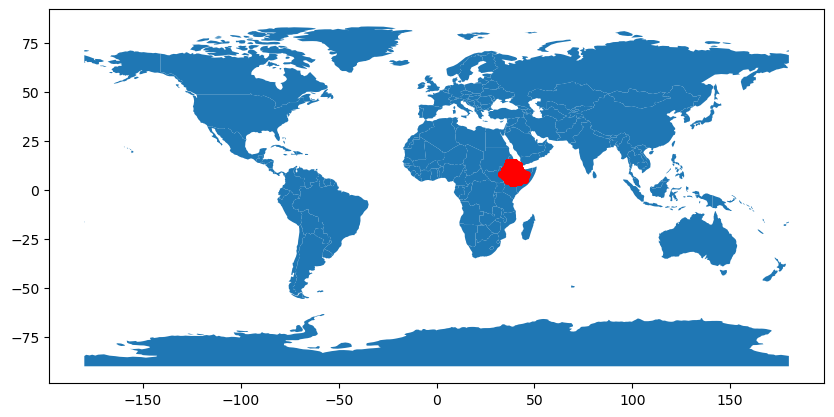

In [29]:
geometry=[Point(xy) for xy in zip(df['longitude'],df['latitude'])]
gdf=GeoDataFrame(df,geometry=geometry)
ethiopia=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=ethiopia.plot(figsize=(10,6)),marker='o',color='red',markersize=15)
# Save figure
plt.savefig('figures/eventdis2.png',dpi=300)
plt.show()

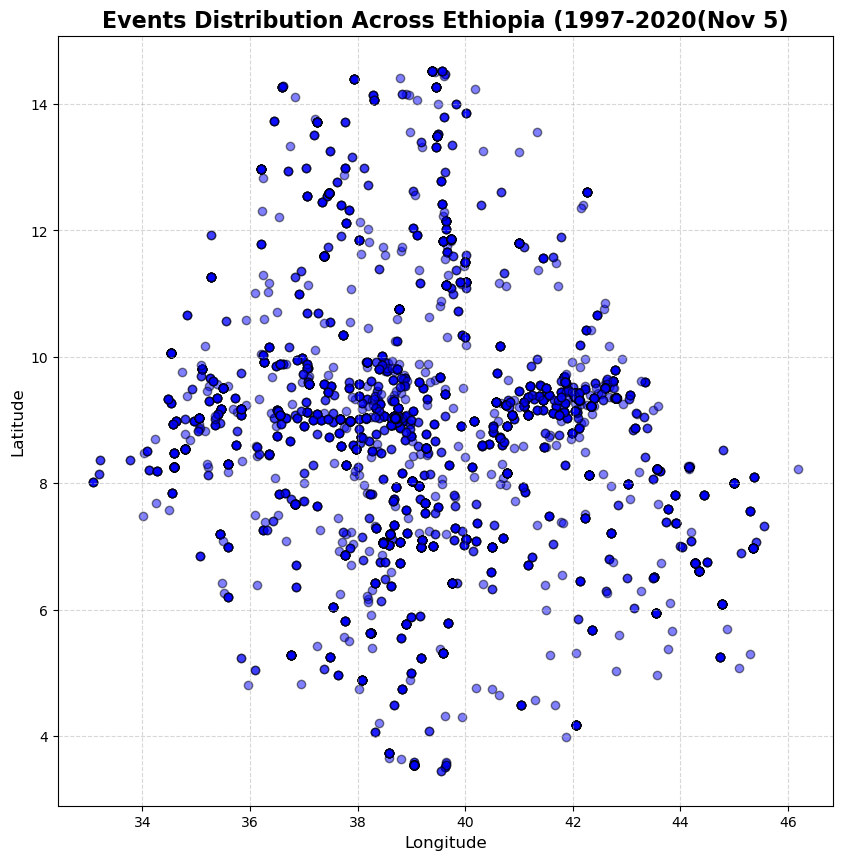

In [30]:
# Create fig and axis
fig, ax=plt.subplots(figsize=(10,10))
plt.scatter(x=df['longitude'],y=df['latitude'],c='blue',alpha=0.5,edgecolor='black')
plt.title('Events Distribution Across Ethiopia (1997-2020(Nov 5)',fontsize=16,fontweight='bold')
plt.xlabel('Longitude',fontsize=12)
plt.ylabel('Latitude',fontsize=12)
plt.grid(True,linestyle='--',alpha=0.5)
# Save figure
plt.savefig('figures/eventdis.png',dpi=300)
plt.show()

The plot below supports the argument social and political discomforts were indeed more popular
outside Tigray from 1997 to 2020 with Addis Ababa recorded about 300 followed by Jijiga
recording about 250 signaled calls against the ruling government TPLF led EPRDF whose base was
in Arat Killo , Addis Abeba. Only Zela Ambesa from the Tigray region made it to the top 40 hostile
places in Ethiopia from 1997-2020 and had seen resemblance of armed clash (32) and this is the
fact that it is a boarder that has historical issues with neighboring despotic regium of Eritrea.
A question begs here whether Tigreans were happy with the regium, or such protests were
restricted in the region? What were the implications when there is unrest in other parts of
Ethiopia but not in Tigray? How did other Ethiopians see the Tigreans during the realm of EPRDF?
Those and related questions will be discussed throughout this article.

In [31]:
df.location.value_counts().head(40)

Addis Ababa            302
Jijiga                 255
Ambo                   119
Nekemt                 104
Gonder                  95
Babile                  95
Moyale                  88
Degeh Bur               85
Gambella                79
Dire Dawa               75
Bahir Dar               68
Jima                    60
Shashamane              55
Kebri Dehar             54
Oromo                   53
Nazreth                 51
Mieso                   49
Chinaksen               45
Dembi Dolo              43
Asosa                   41
Harar                   40
Korahe                  40
Ogolcho                 39
Haramaya University     38
Aweday                  36
Asebe Teferi            33
Zela Ambesa             32
Dessie                  29
Semera                  28
Somali                  28
Gimbi                   27
Garbo                   27
Ginchi                  26
Fik                     26
Buur                    26
Dodola                  25
Kobo                    25
S

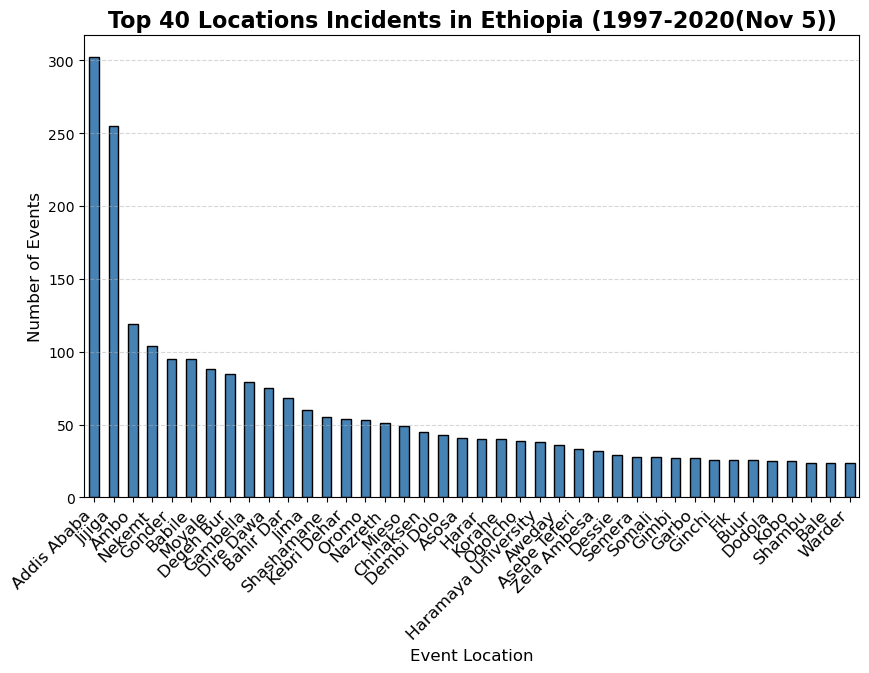

In [32]:
# Create fig and axis for top 40 incident location
fig,ax=plt.subplots(figsize=(10,6))
df.location.value_counts().head(40).plot(kind='bar',ax=ax,color='steelblue',edgecolor='black')
plt.title('Top 40 Locations Incidents in Ethiopia (1997-2020(Nov 5))',fontsize=16,fontweight='bold')
plt.xlabel('Event Location',fontsize=12)
plt.ylabel('Number of Events',fontsize=12)
plt.xticks(rotation=45,ha='right',fontsize=12)
plt.yticks(fontsize=10)
plt.grid(axis='y',linestyle='--',alpha=0.5)
# Save the figure
plt.savefig('figures/location.png',dpi=300)
plt.show()

#### Incidents ranges from peace to bullet:
Public demonstrations are not easy in most third world countries, and they always result in
clashes and fatalities of civilians. Ethiopia will be ranked top among countries who prevents its
citizens the freedom of expression through peaceful protest and alike which is one of the basic
human rights fundamentals in the United Nations charter the Universal Declaration of Human
Rights Article 19. Ethiopia is a member of the UN. But what were the ranges of incidents from
1997 to 2020 and their implications and contributions towards Tigray genocide?

In [33]:
# Summarize counts by event_type
inc_count_bytype=df['event_type'].value_counts()
inc_count_bytype

Protests                      1924
Battles                       1885
Violence against civilians     968
Riots                          449
Strategic developments         225
Explosions/Remote violence     142
Name: event_type, dtype: int64

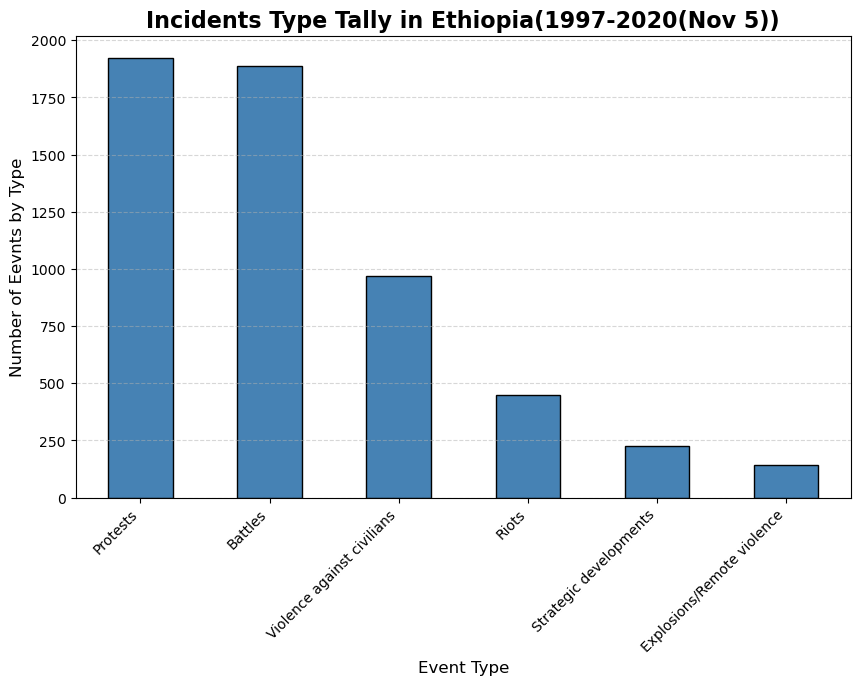

In [34]:
# Create a figure and axis
fig,ax=plt.subplots(figsize=(10,6))
# Plot incident count by incident type
inc_count_bytype.plot(kind='bar',ax=ax,color='steelblue',edgecolor='black')
plt.title('Incidents Type Tally in Ethiopia(1997-2020(Nov 5))',fontsize=16,fontweight='bold')
plt.xlabel('Event Type',fontsize=12)
plt.ylabel('Number of Eevnts by Type',fontsize=12)
plt.xticks(rotation=45,ha='right',fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y',linestyle='--',alpha=0.5)
# Save the figure
plt.savefig('figures/incident.png',dpi=300)
plt.show()

In [35]:
count_by_region=tig_df['region'].value_counts()
count_by_region

NameError: name 'tig_df' is not defined

Since the aftermath of the second Ethiopian National election (1997) to the morning of the start of Tigray genocide(Nov 2020) there were about 1924 protests, 1885 battles, 968 violence against civilians, 449 riots, 225 strategic developments and 142 explosions/remote violence recorded, all
against the party in the federal super house. Those are astonishing figures especially for a country who was applauded by world bank and IMF for its double-digit growth in this period.The plot below can be even broken further to understand whether the protest was peaceful or not or what the battles constitute into.

In [ ]:
inc_count_subeventtype=df['sub_event_type'].value_counts()
inc_count_subeventtype

In [ ]:
# Create figure and xis
fig,ax=plt.subplots(figsize=(10,6))
inc_count_subeventtype.plot(kind='bar',ax=ax,color='steelblue',edgecolor='black')
plt.title('Incident Type Tally by Sub_Type in Ethiopia(1997-2020(Nov 5))',fontsize=16,fontweight='bold')
plt.xlabel('Sub Event Type',fontsize=12)
plt.ylabel('Number of Events by Sub_Type',fontsize=12)
plt.xticks(rotation=45,ha='right',fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y',linestyle='--',alpha=0.5)
# save the figure
plt.savefig('figures/subeventtype.png',dpi=300)
plt.show()

#### What was the death toll?

One can expect the death toll to be tremendous given there being close to 2000 protests and armed clashes across Ethiopia, but it should be also noted undemocratic countries and its leaders are also experts hiding information from the public and the international communities.The fatalities in Ethiopia from 1997-2020 collected by Kimetric data publisher are shown below.

In [ ]:
# Create fig and axis
fig,ax=plt.subplots(figsize=(8,6))
# Plot the line graph
death.plot(x='year', y='fatalities', ax=ax, color='blue', linewidth=2, marker='o', markersize=8)
# Set x-axis and y-axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Fatalities')
# Set title
ax.set_title('Fatalities by year in Ethiopia (1997-2020(Nov 5))')
# Save the figures
plt.savefig('figures/fatalities.png')
plt.show()


### Conclusion:
Conclusion:
Tigray leadership, scholars and political elites have all the evidence that an entire Ethiopia was
united against fighting the TPLF led EPRDF and evoking hate towards a very ‘quiet’ people of
Tigray during the leadership tenure. They have failed to monitor and analyze every event
occurrence and unbale to translate empirically or politically what they accrued towards the
security and wellbeing the people of Tigray which they have the responsibility to do so at the
federal and regional level. The people of Tigray were indeed ‘stamped in the back’ by its own
leaders, elites and scholars and resulted a genocide that leaves a scar that will live with the people
of Tigray for generations to come.
Tigray leadership, scholars and political elites have all the evidence that an entire Ethiopia was
united against fighting the TPLF led EPRDF and evoking hate towards a very ‘quiet’ people of
Tigray during the leadership tenure. They have failed to monitor and analyze every event
occurrence and unbale to translate empirically or politically what they accrued towards the
security and wellbeing the people of Tigray which they have the responsibility to do so at the
federal and regional level. The people of Tigray were indeed ‘stamped in the back’ by its own
leaders, elites and scholars and resulted a genocide that leaves a scar that will live with the people
of Tigray for generations to come.